In [1]:
import pandas as pd

In [2]:
data=pd.read_csv(r"C:\Users\Charvi\Downloads\Salary_Data.csv")

In [3]:
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [4]:
data.shape

(6704, 6)

In [5]:
#finding null values
data.isna() #is there any null set is availabe

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
6699,False,False,False,False,False,False
6700,False,False,False,False,False,False
6701,False,False,False,False,False,False
6702,False,False,False,False,False,False


In [6]:
data.isna().sum() #how may null values in each feature

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [7]:
data.dropna(inplace=True)  # drops rows with any null values

In [8]:
data.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [9]:
data.shape

(6698, 6)

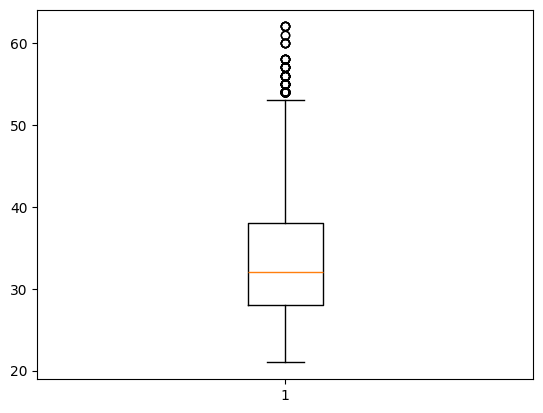

In [10]:
#outlier detection
import matplotlib.pyplot as plt   #visualization
plt.boxplot(data['Age'])
plt.show() 

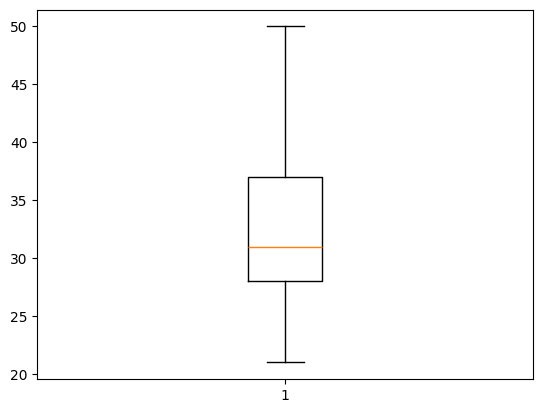

In [11]:
data=data[(data['Age']<=50)]
plt.boxplot(data['Age'])
plt.show()

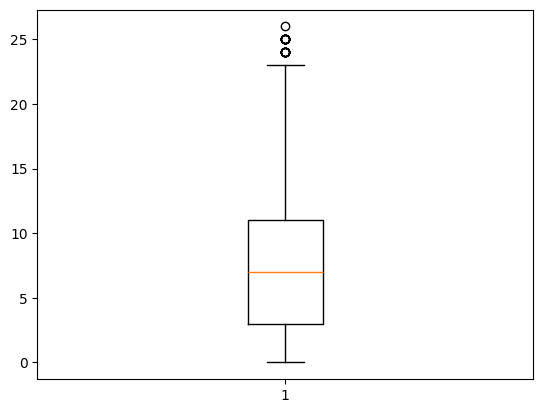

In [12]:
import matplotlib.pyplot as plt   #visualization
plt.boxplot(data['Years of Experience'])
plt.show() 

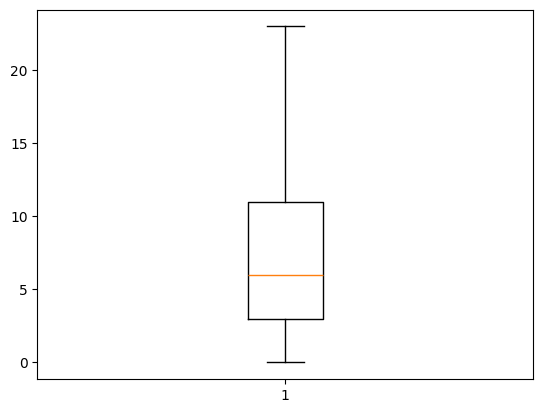

In [13]:
data=data[(data['Years of Experience']<=23)]
plt.boxplot(data['Years of Experience'])
plt.show() 

In [14]:
data.shape

(6485, 6)

In [15]:
print(data['Education Level'].value_counts())

Education Level
Bachelor's Degree    2241
Master's Degree      1533
PhD                  1234
Bachelor's            753
High School           440
Master's              283
phD                     1
Name: count, dtype: int64


In [16]:
# Combine similar education levels
data['Education Level'] = data['Education Level'].replace({
    "Bachelor's Degree": "Bachelor's",
    "Master's Degree": "Master's",
    "phD": "PhD"
})
print(data['Education Level'].value_counts())


Education Level
Bachelor's     2994
Master's       1816
PhD            1235
High School     440
Name: count, dtype: int64


In [17]:
print(data['Gender'].value_counts())

Gender
Male      3526
Female    2951
Other        8
Name: count, dtype: int64


In [18]:
data=data[data['Gender']!= 'Other']
print(data.Gender.value_counts())

Gender
Male      3526
Female    2951
Name: count, dtype: int64


In [19]:
print(data['Job Title'].value_counts())

Job Title
Software Engineer                518
Data Scientist                   445
Data Analyst                     363
Product Manager                  313
Senior Project Engineer          293
                                ... 
Account Manager                    1
Help Desk Analyst                  1
Business Intelligence Analyst      1
VP of Finance                      1
Principal Engineer                 1
Name: count, Length: 187, dtype: int64


In [20]:
# Split features and target
X = data.drop(columns=['Salary'])
y = data['Salary']

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Define features
categorical = ['Gender', 'Education Level', 'Job Title']
numeric = ['Age', 'Years of Experience']

# Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('num', StandardScaler(), numeric)  # numeric data is dense so safe to center
])

# Define models (no nested scalers here!)
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "DecisionTree": DecisionTreeRegressor(),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR(),
}

In [22]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train


,Age,Gender,Education Level,Job Title,Years of Experience
3189,35.0,Female,Master's,Data Analyst,9.0
6261,45.0,Female,Master's,Sales Manager,8.0
305,36.0,Male,Bachelor's,Senior Business Analyst,8.0
6558,27.0,Male,PhD,Marketing Manager,4.0
457,31.0,Female,Bachelor's,Software Engineer,6.0
...,...,...,...,...,...
3980,33.0,Male,Bachelor's,Operations Manager,7.0
5408,29.0,Female,Bachelor's,Digital Marketing Specialist,4.0
5443,37.0,Male,Bachelor's,Product Manager,13.0
5607,32.0,Male,Bachelor's,Product Manager,7.0


In [23]:

# Dictionary to store R² scores for each model
r2_scores = {}

# Train and evaluate each model
for name, reg_model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', reg_model)
    ])
    
    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_test)

    r2 = r2_score(y_test, preds)
    r2_scores[name] = r2  # Store R² score

    print(f"\n{name}")
    print("R2 Score:", r2)
    print("MAE:", mean_absolute_error(y_test, preds))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, preds)))






LinearRegression
R2 Score: 0.8451362141633496
MAE: 14849.929875574393
RMSE: 20184.85972115555

Ridge
R2 Score: 0.8455096793550669
MAE: 14834.788976259564
RMSE: 20160.50640715337

RandomForest
R2 Score: 0.9705961570779233
MAE: 3389.4364893848056
RMSE: 8795.344334557689

GradientBoosting
R2 Score: 0.9012973019409752
MAE: 12146.399838841025
RMSE: 16114.443488084567

AdaBoost
R2 Score: 0.7740728969250278
MAE: 20878.583796497987
RMSE: 24380.07102052424

DecisionTree
R2 Score: 0.9650352085788677
MAE: 3246.8399646845173
RMSE: 9591.0525494114

KNN
R2 Score: 0.9500387777526533
MAE: 5057.035185185185
RMSE: 11464.822274440463

SVR
R2 Score: 0.011889269417681536
MAE: 43962.33172438056
RMSE: 50986.31295907179


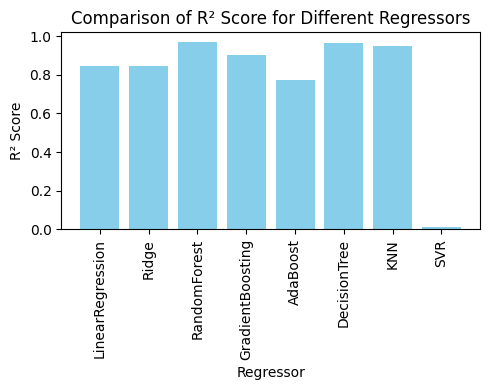

In [24]:
# Plotting the R² Score Comparison
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 4))
plt.bar(r2_scores.keys(), r2_scores.values(), color='skyblue')
plt.xticks(rotation=90)
plt.xlabel("Regressor")
plt.ylabel("R² Score")
plt.title("Comparison of R² Score for Different Regressors")
plt.tight_layout()
plt.show()

In [25]:
#Continuing with random forest regressor
import joblib
from sklearn.pipeline import Pipeline

# Wrap your best model in a pipeline
best_model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, max_depth=None))
])

# Fit the pipeline on the full data (X and y)
best_model_pipeline.fit(X, y)

# Save the whole pipeline
joblib.dump(best_model_pipeline, "best_salary_model.pkl")
print("Best model saved successfully as best_salary_model.pkl")





Best model saved successfully as best_salary_model.pkl


In [26]:
import pandas as pd

# Assuming your DataFrame is called df
for col in data.columns:
    print(f"Column: {col}")
    print(data[col].unique())
    print("\n")

Column: Age
[32. 28. 45. 36. 29. 42. 31. 26. 38. 48. 35. 40. 27. 44. 33. 39. 25. 34.
 47. 30. 41. 37. 24. 43. 46. 49. 50. 23. 22. 21.]


Column: Gender
['Male' 'Female']


Column: Education Level
["Bachelor's" "Master's" 'PhD' 'High School']


Column: Job Title
['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Business Analyst' 'VP of Operations' 'IT Support'
 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'Accountant' 'Data Scientist' 'Marketing Specialist'
 'Technical Writer' 'HR Generalist' 'Project Engineer'
 'Customer Success Rep' 'Sales Executive' 'UX Designer'
 'Operations Director' 'Network Enginee

In [27]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor  # for type hinting
import numpy as np

# 🔁 Recreate the preprocessor (same as training)
categorical = ['Gender', 'Education Level', 'Job Title']
numeric = ['Age', 'Years of Experience']

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('num', StandardScaler(), numeric)
])


# Load the trained model
model = joblib.load("best_salary_model.pkl")

st.set_page_config(page_title="Employee Salary Prediction", page_icon="💼", layout="centered")

st.title("💼Employee Salary Prediction App")
st.markdown("Predict the salary of an employee")

# Sidebar inputs
st.sidebar.header("Input Employee Details")

age = st.sidebar.slider("Age", 18, 50, 30)
gender = st.sidebar.selectbox("Gender", ["Male", "Female"])
education = st.sidebar.selectbox("Education Level", [ "Bachelor's", "Master's", "PhD","High School"])
job_title = st.sidebar.selectbox("Job Title", [
    "Account Manager", "Accountant", "Administrative Assistant", "Back end Developer", "Business Analyst",
"Business Development Manager", "Business Intelligence Analyst", "Chief Data Officer", "Content Marketing Manager",
"Copywriter", "Creative Director", "Customer Service Manager", "Customer Service Rep", "Customer Service Representative",
"Customer Success Manager", "Customer Success Rep", "Data Analyst", "Data Entry Clerk", "Data Scientist", 
"Delivery Driver", "Digital Content Producer", "Digital Marketing Manager", "Digital Marketing Specialist", 
"Director of Business Development", "Director of Data Science", "Director of Engineering", "Director of Finance",
"Director of HR", "Director of Marketing", "Director of Operations", "Director of Product Management", "Director of Sales",
"Director of Sales and Marketing", "Event Coordinator", "Financial Advisor", "Financial Analyst", "Financial Manager",
"Front End Developer", "Front end Developer", "Full Stack Engineer", "Graphic Designer", "Help Desk Analyst", 
"HR Generalist", "HR Manager", "Human Resources Coordinator", "Human Resources Director", "Human Resources Manager",
"IT Manager", "IT Support", "IT Support Specialist", "Juniour HR Coordinator", "Juniour HR Generalist",
"Junior Account Manager", "Junior Accountant", "Junior Advertising Coordinator", "Junior Business Analyst",
"Junior Business Development Associate", "Junior Business Operations Analyst", "Junior Copywriter",
"Junior Customer Support Specialist", "Junior Data Analyst", "Junior Data Scientist", "Junior Designer", 
"Junior Developer", "Junior Financial Advisor", "Junior Financial Analyst", "Junior HR Coordinator", 
"Junior HR Generalist", "Junior Marketing Analyst", "Junior Marketing Coordinator", "Junior Marketing Manager",
"Junior Marketing Specialist", "Junior Operations Analyst", "Junior Operations Coordinator", "Junior Operations Manager", 
"Junior Product Manager", "Junior Project Manager", "Junior Recruiter", "Junior Research Scientist",
"Junior Sales Associate", "Junior Sales Representative", "Junior Social Media Manager", "Junior Social Media Specialist",
"Junior Software Developer", "Junior Software Engineer", "Junior UX Designer", "Junior Web Designer", 
"Junior Web Developer", "Marketing Analyst", "Marketing Coordinator", "Marketing Director", "Marketing Manager", 
"Marketing Specialist", "Network Engineer", "Office Manager", "Operations Analyst", "Operations Director", "Operations Manager",
"Principal Engineer", "Principal Scientist", "Product Designer", "Product Manager", "Product Marketing Manager", 
"Project Engineer", "Project Manager", "Public Relations Manager", "Receptionist", "Recruiter", "Research Director",
"Research Scientist", "Sales Associate", "Sales Director", "Sales Executive", "Sales Manager", "Sales Operations Manager", 
"Sales Representative", "Senior Accountant", "Senior Account Executive", "Senior Account Manager",
"Senior Advertising Coordinator", "Senior Analyst", "Senior Business Analyst", "Senior Business Development Manager",
"Senior Consultant", "Senior Copywriter", "Senior Customer Service Manager", "Senior Data Analyst", "Senior Data Engineer",
"Senior Data Scientist", "Senior Designer", "Senior Developer", "Senior Engineer", "Senior Financial Advisor", 
"Senior Financial Analyst", "Senior Financial Manager", "Senior Graphic Designer", "Senior HR Generalist", "Senior HR Manager",
"Senior HR Specialist", "Senior Human Resources Coordinator", "Senior Human Resources Manager", "Senior Human Resources Specialist",
"Senior IT Consultant", "Senior IT Project Manager", "Senior IT Support Specialist", "Senior Manager", "Senior Marketing Analyst",
"Senior Marketing Coordinator", "Senior Marketing Director", "Senior Marketing Manager", "Senior Marketing Specialist", 
"Senior Operations Analyst", "Senior Operations Coordinator", "Senior Operations Manager", "Senior Product Designer",
"Senior Product Development Manager", "Senior Product Manager", "Senior Product Marketing Manager", 
"Senior Project Coordinator", "Senior Project Engineer", "Senior Project Manager", "Senior Quality Assurance Analyst", 
"Senior Research Scientist", "Senior Researcher", "Senior Sales Manager", "Senior Sales Representative", 
"Senior Scientist", "Senior Software Architect", "Senior Software Developer", "Senior Software Engineer", 
"Senior Software Manager", "Senior Strategy Consultant", "Senior Training Specialist", "Senior UX Designer", 
"Social Media Man", "Social Media Manager", "Social Media Specialist", "Software Developer", "Software Engineer",
"Software Engineer Manager", "Software Manager", "Software Project Manager", "Strategy Consultant", "Supply Chain Analyst",
"Supply Chain Manager", "Technical Recruiter", "Technical Support Specialist", "Technical Writer",
"Training Specialist", "UX Designer", "UX Researcher", "VP of Finance", "VP of Operations", "Web Developer"

])
experience = st.sidebar.slider("Years of Experience", 0, 23, 5)

# Build input DataFrame
input_df = pd.DataFrame({
    'Age': [age],
    'Gender': [gender],
    'Education Level': [education],
    'Job Title': [job_title],
    'Years of Experience': [experience]
})

st.write("### 🔎 Input Data")
st.write(input_df)

# Predict button
if st.button("Predict Salary Class"):
    prediction = model.predict(input_df)
    st.success(f"✅ Prediction: {prediction[0]}")

# Batch prediction
st.markdown("---")
st.markdown("#### 📂 Batch Prediction")
uploaded_file = st.file_uploader("Upload a CSV file for batch prediction", type="csv")

if uploaded_file is not None:
    batch_data = pd.read_csv(uploaded_file)
    st.write("Uploaded data preview:", batch_data.head())
    batch_data = batch_data.dropna()
    batch_preds = model.predict(batch_data)
    batch_data['PredictedClass'] = batch_preds
    st.write("✅ Predictions:")
    st.write(batch_data.head())
    csv = batch_data.to_csv(index=False).encode('utf-8')
    st.download_button("Download Predictions CSV", csv, file_name='predicted_classes.csv', mime='text/csv')


Overwriting app.py
